# Filippo Conforto - RLab 04

In [1]:
library(tidyverse, quiet = TRUE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Exercise 1

Binomial distribution

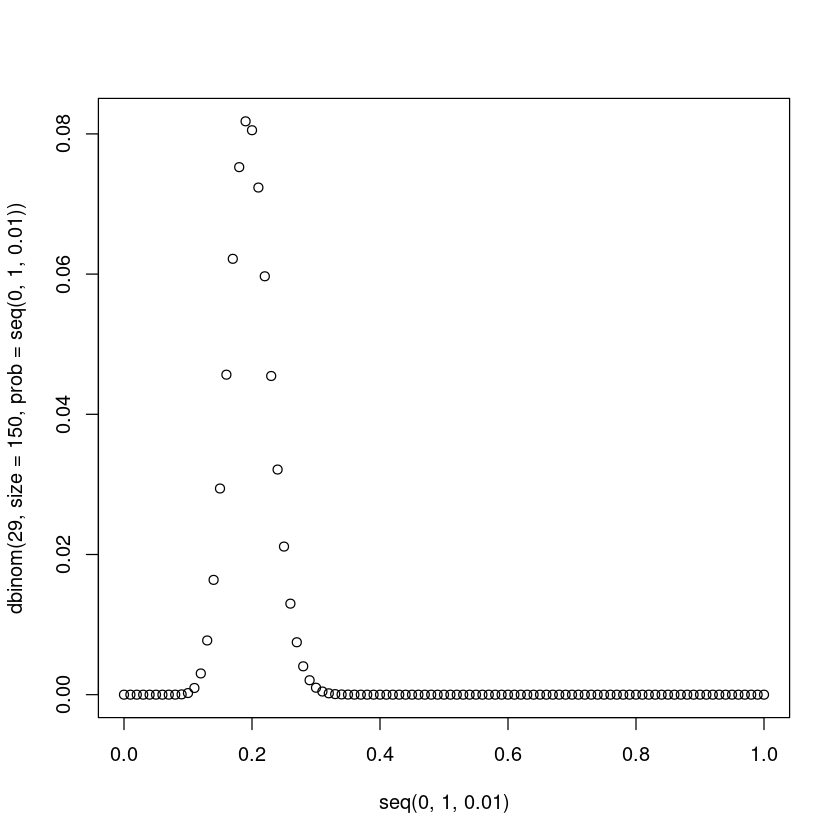

In [2]:
plot(seq(0,1,0.01),dbinom(29,size = 150, prob = seq(0,1,0.01)))

In [22]:
post_norm = integrate(function (x) dbinom(29,size = 150, prob = x), 0, 1)

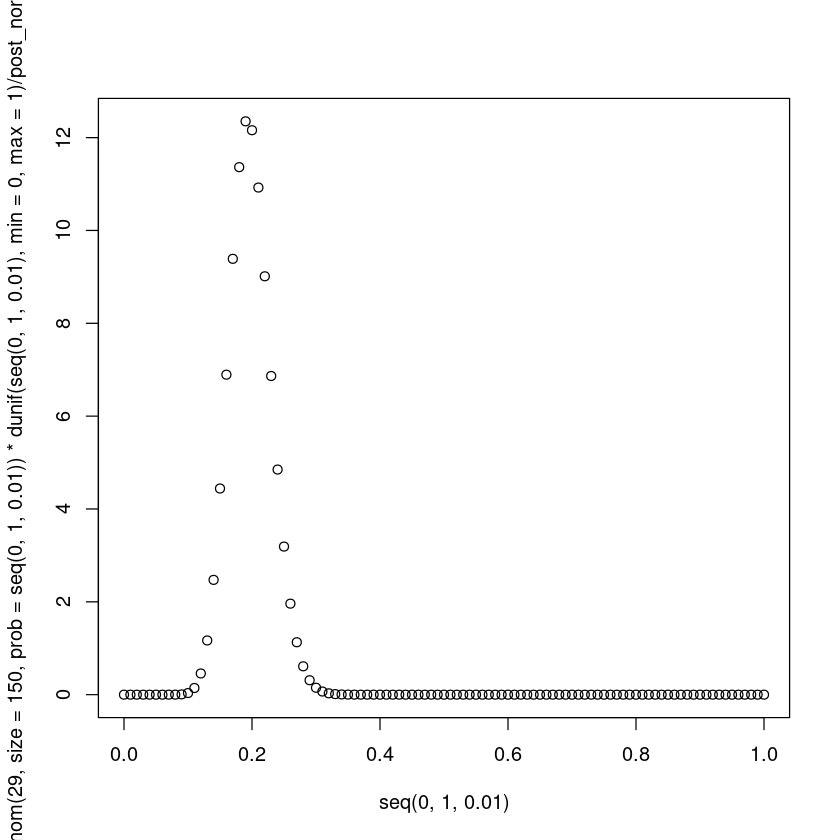

In [25]:
plot(seq(0,1,0.01),dbinom(29,size = 150, prob = seq(0,1,0.01))*dunif(seq(0,1,0.01),min=0,max=1)/post_norm[[1]])

## Exercise 2

In [6]:
prior1 = dbeta
alfa = ((1-0.2)/0.08^2-1/0.2)*0.2^2
beta = alfa*(1/0.2 - 1)

In [7]:
prior2 = dunif

In [8]:
prior3 = function(x) {case_when(
    (x<0.1) & (x>=0) ~ 20*x/0.7,
    (x<0.3) & (x>=0.1) ~ 2/0.7,
    (x<0.5) & (x>=0.3) ~ 5/0.7-10*x/0.7,
    x>=0.5 ~ 0
)}

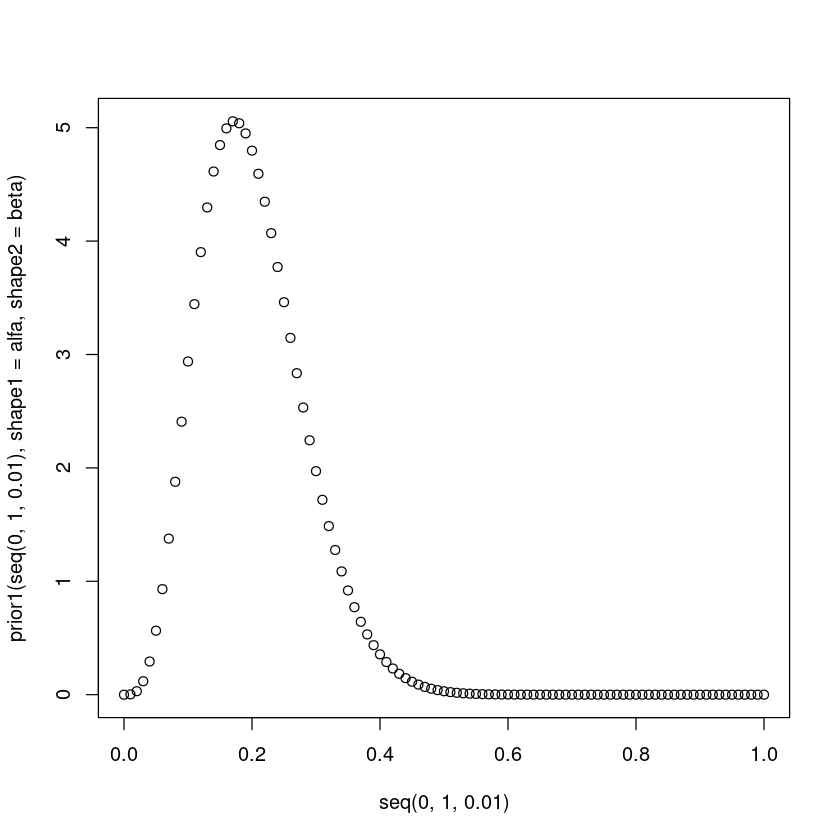

In [9]:
plot(seq(0,1,0.01),prior1(seq(0,1,0.01),shape1 = alfa, shape2 = beta))

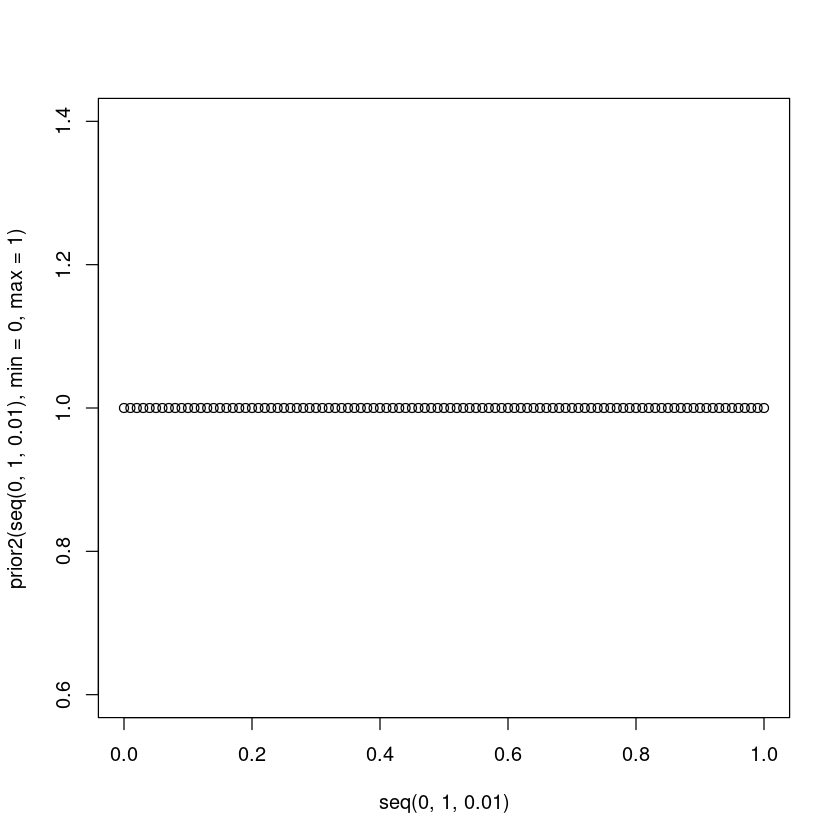

In [10]:
plot(seq(0,1,0.01),prior2(seq(0,1,0.01),min = 0, max=1))

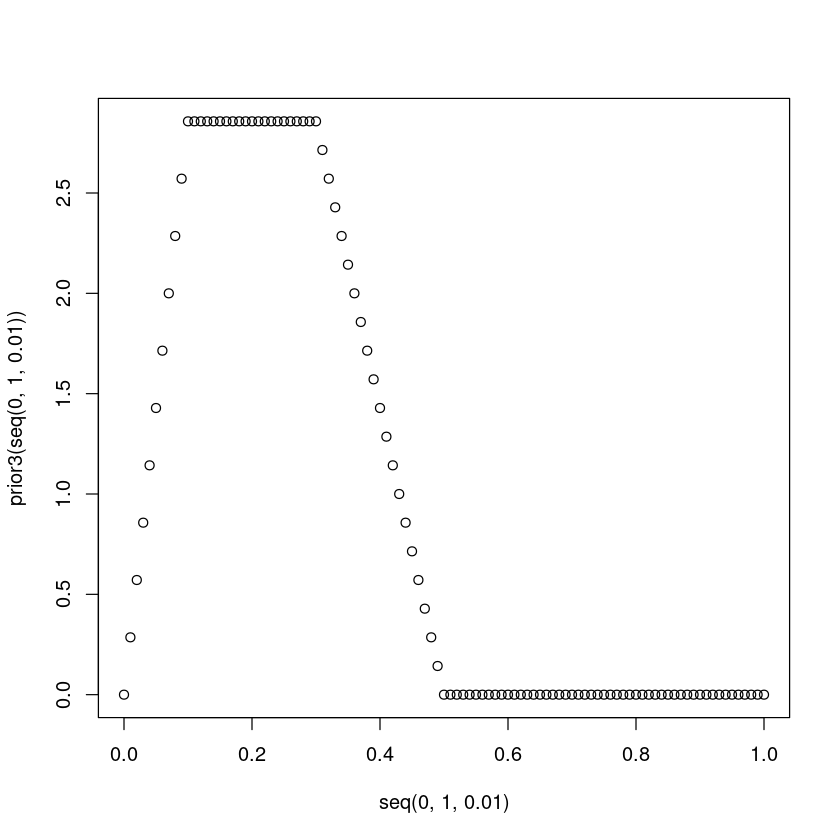

In [11]:
plot(seq(0,1,0.01),prior3(seq(0,1,0.01)))

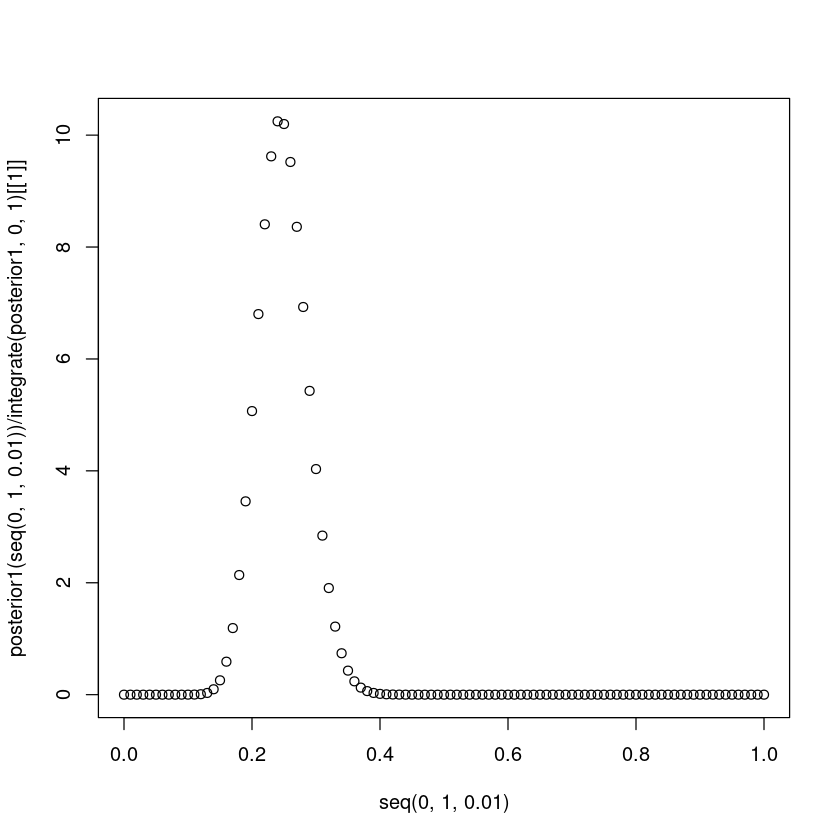

In [12]:
posterior1 = function(x){
    dbinom(26,size = 100, prob = x)*prior1(x,shape1 = alfa, shape2 = beta)
}
plot(seq(0,1,0.01),posterior1(seq(0,1,0.01))/integrate(posterior1,0,1)[[1]])

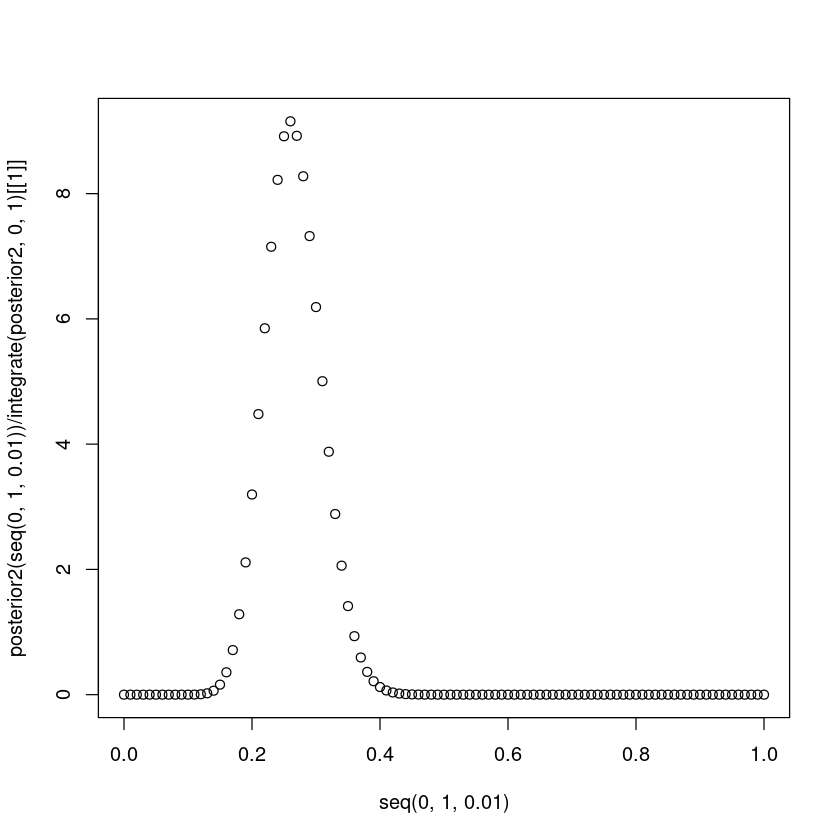

In [13]:
posterior2 = function(x){
    dbinom(26,size = 100, prob = x)*prior2(x,min = 0, max=1)
}
plot(seq(0,1,0.01),posterior2(seq(0,1,0.01))/integrate(posterior2,0,1)[[1]])

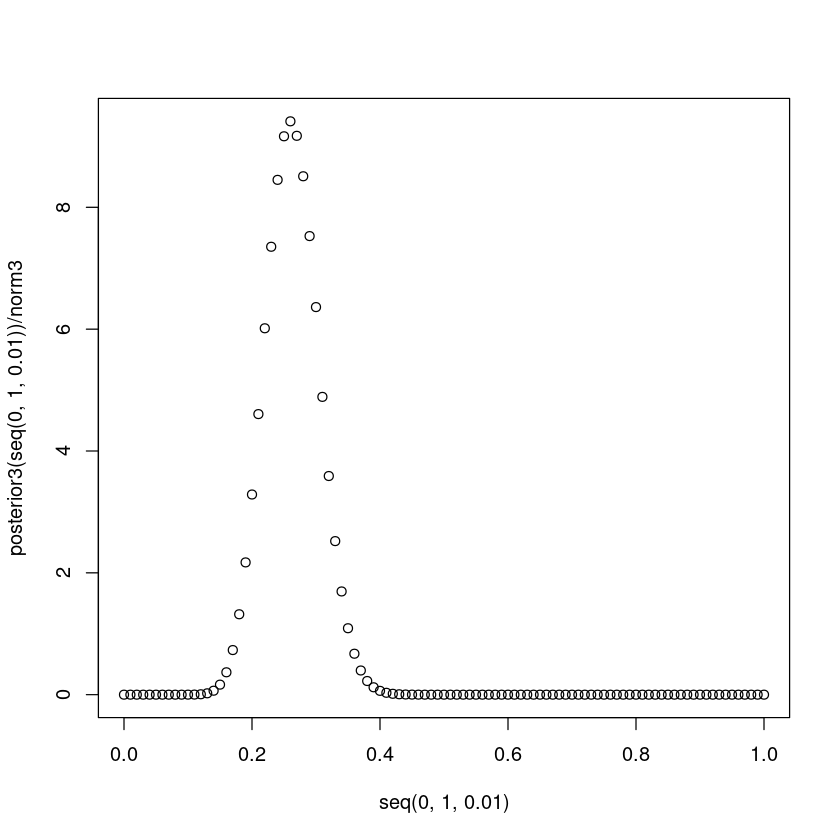

In [49]:

posterior3 = function(x){
    dbinom(26,size = 100, prob = x)*prior3(x)
}
norm3 = integrate(posterior3,0,1)[[1]]
plot(seq(0,1,0.01),posterior3(seq(0,1,0.01))/norm3)

In [21]:
(which.max(posterior3(seq(0,1,0.000001)))-1)*0.000001

[1] 0.26

In [22]:
(which.max(posterior2(seq(0,1,0.000001)))-1)*0.000001

[1] 0.26

In [23]:
(which.max(posterior1(seq(0,1,0.000001)))-1)*0.000001

[1] 0.244262

In [42]:
1-integrate(posterior3,0,0.2)[[1]]

[1] 0.9982415

In [62]:
integrate(posterior3,0.195,0.41)[[1]]/norm3


[1] 0.9506383

In [63]:
integrate(posterior2,0.195,0.41)[[1]]/norm2


ERROR: Error in eval(expr, envir, enclos): object 'norm2' not found


In [62]:
integrate(posterior1,0.195,0.41)[[1]]/norm1


[1] 0.9506383

## Exercise 3

In [99]:
H = 1
T = 0
c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H,H, H)

[1] 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1